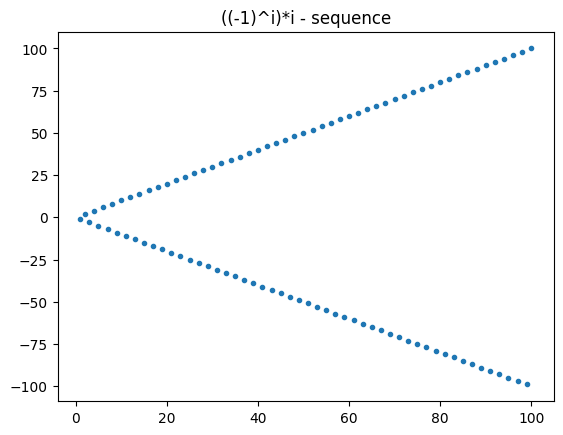

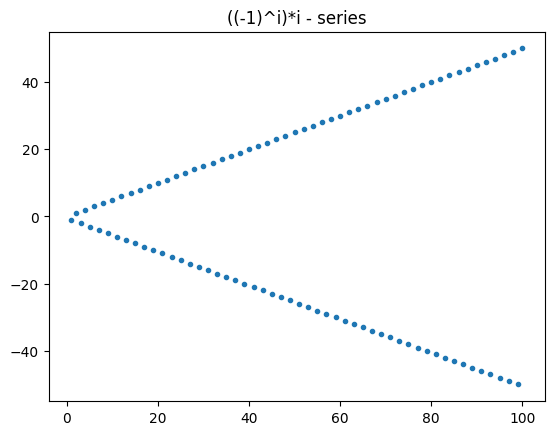

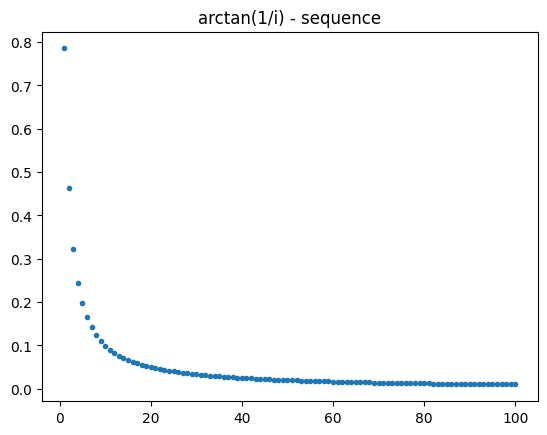

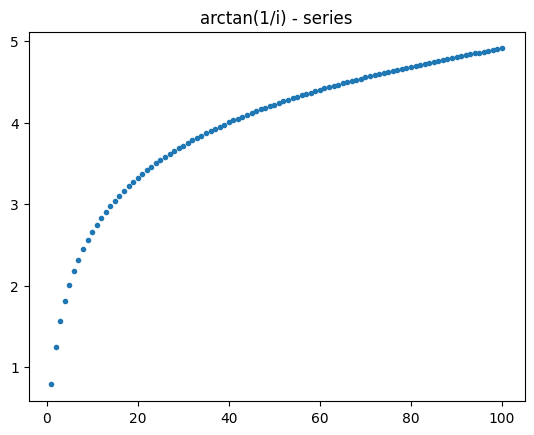

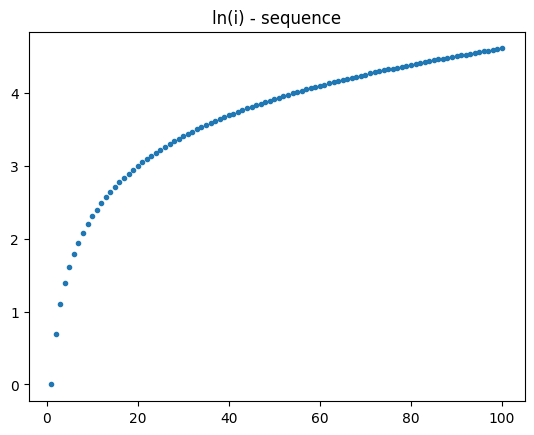

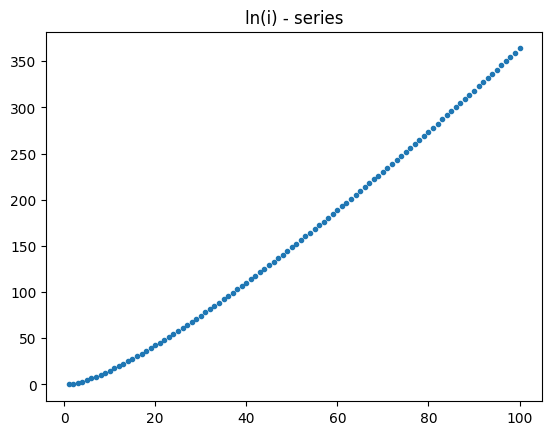

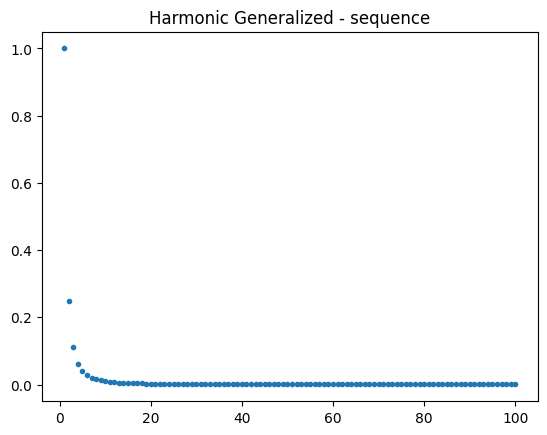

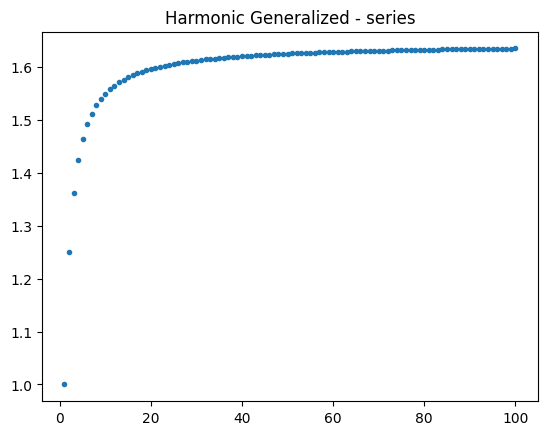

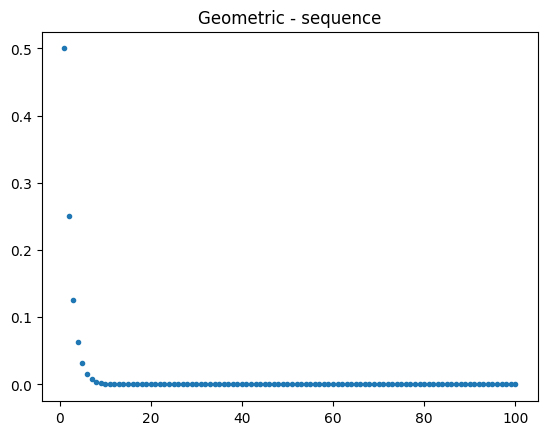

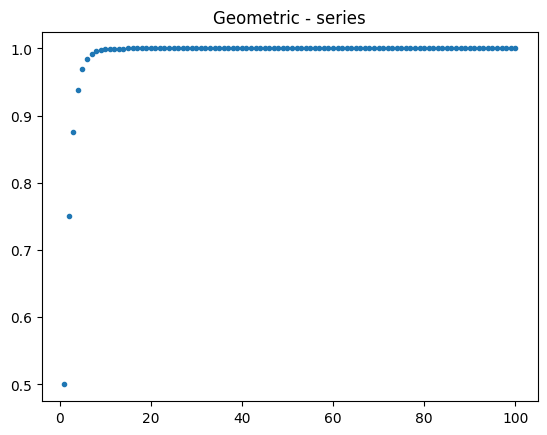

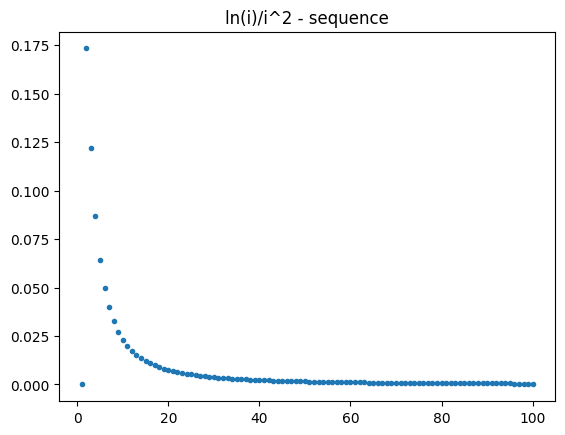

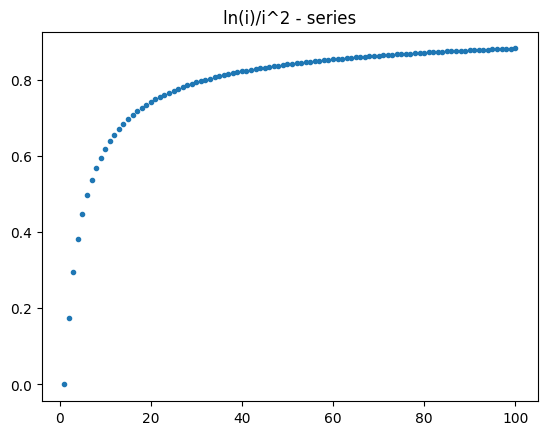

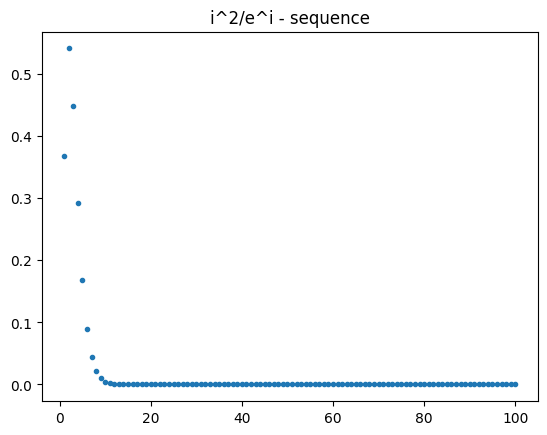

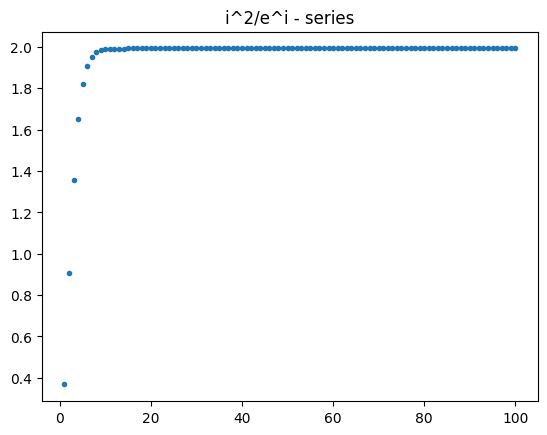

In [50]:
# VERSION 1 - WORKING 
# en: Program to compute the terms of any sequence, 
# the sum and terms of its associated series, and plot sequence and series.
# it: Programma per calcolare i termini di qualsiasi sequenza, 
# la somma e termini della serie associata, e visualizzare sequenza e serie.

# Made by Giuseppe Tavella, Computer Engineering student at Unical, DIMES


import math
import matplotlib.pyplot as plt


# i: mobile index
def sequenceA(start,end):
    return lambda i: 1/(i**2)

def sequenceB(start,end):
    return lambda i: (1/2)**i

def sequenceC(start,end):
    return lambda i: math.log(i,math.e)/(i**2)

def sequenceD(start,end):
    return lambda i: (i**2)/(math.e**i)

def sequenceE(start,end):
    return lambda i: math.log(i,math.e)

def sequenceF(start,end):
    return lambda i: math.atan(1/i)

def sequenceG(start,end):
    return lambda i: ((-1)**i)*i

# STEP 1: define your sequence here. Follow this format:
# def sequenceLetter(start,end):
#     return lambda i: <insert generic term of the sequence>



class Series:
    def __init__(self,meta):
        self.start = meta['start']
        self.end = meta['end']
        self.interval=[]
        for i in range(self.start,self.end+1):
            self.interval.append(i)
            
    def plot(self,series_params):
        series_name=series_params['name']
        sequence=series_params['sequence_fn'](self.start,self.end)
        terms=[]
        series=[]
        s=[0]
        # after computation, terms, series and sum will get populated/updated         
        self.compute(sequence,terms,series,s)
        
        # visualization functions         
        fig, ax = plt.subplots(1,1)  
        plt.plot(interval, terms, '.')  
        plt.title(series_name+' - sequence')
        fig, ax = plt.subplots(1,1)  
        plt.plot(interval, series, '.')
        plt.title(series_name+' - series')
    
    def compute(self,sequence,terms,series,s):
        def f(i):
            term=sequence(i)
            s[0]+=term
            terms.append(term)
            series.append(s[0])
            if i==self.end: return
            f(i+1)
        f(self.start)
        
        
series=Series({
    'start': 1,
    'end': 100
})


# STEP 2: add your new sequence here, give it a name if you want
# ...
series.plot({'name': '((-1)^i)*i', 'sequence_fn': sequenceG})
series.plot({'name': 'arctan(1/i)', 'sequence_fn': sequenceF})
series.plot({'name': 'ln(i)', 'sequence_fn': sequenceE})
series.plot({'name': 'Harmonic Generalized', 'sequence_fn': sequenceA})
series.plot({'name': 'Geometric', 'sequence_fn': sequenceB})
series.plot({'name': 'ln(i)/i^2', 'sequence_fn': sequenceC})
series.plot({'name': 'i^2/e^i', 'sequence_fn': sequenceD})





In [42]:
# VERSION 2 - IT WORKS BUT NOT READY, just tinkering



# negative numbers not allowed, only non negative integers (>=0)
def validate_input(series_params):
    start=series_params['start']
    end=series_params['end']
    if start<0 or isinstance(start,float) or isinstance(end,float):
        raise Exception('Domain must be x>=0, x natural.')

        
# merge the keys:values of dict A into dict B         
def merge_dict_into(dictA,dictB):
    for key in dictA.keys():
        dictB[key]=dictA[key]
    


# Pre-compute sequence function and returns another function where you'll have to pass only the mobile index i to it
# because the start and end values of the series, as well as the sequence function will always be the same at each point
# during the computation / recursion, there's no point passing them for each recursive call
# thus it makes much more sense to pre-compute a function that already knows what the start,end values and sequence function is,
# so that you'll only have to pass it the updated mobile index i
# (see function sequence and function f)
def compute_series(series_params, series_meta, series_info, interval, terms, series):

    validate_input(series_params)
        
    merge_dict_into(series_params, series_info)

    start=series_params['start']
    end=series_params['end']
    # pre-compute sequence function, returns a function     
    sequence=series_params['sequence_fn'](start,end)
    
    # recursive function
    # it does not return any values, because there's no return value needed
    # instead, I update values in dictionaries and lists     
    def f(i):
        # compute current term          
        term=sequence(i)
        
        # update interval,terms,sum,series
        interval.append(i)
        terms.append(term)
        series_info['sum']+=term
        series.append(series_info['sum'])
        
        # Base case - if mobile index has reached the end
        if i==end:
            return
        # if you are at any generic point except the last term of the sequence
        f(i+1)

    # the first value of i (mobile index) is the value of start
    # i=start
    f(start)

    

def save_to_csv(series_meta,interval,terms,series):
    if series_meta['save_to_file']:
        file_name=series_meta['output_file_name']
        with open(f'{file_name}.csv', 'w') as file:
            file.writelines("i,sequence,series\n")
            for i in range(len(interval)):
                file.writelines(f'{interval[i]},{terms[i]},{series[i]}\n')




def display_plot(interval,terms,series_values):
    fig, ax = plt.subplots(1,1)  # Create a figure containing a single axes.
    ax.plot(interval, terms)  # Plot some data on the axes.
    ax.plot(interval,series_values)
    plt.show()
            

    



# DO NOT MODIFY HERE
# Lists of numbers that contain the result of the computation
interval=[]
terms=[]
series=[]


# MODIFY HERE essential information
# The initial parameters I provide for computation 
# IMPORTANT: be careful about the domain
# for example: cannot divide by 0, logarithm argument must be >0, argument of even root must be >=0, etc.

series_params={
    'start': 1,
    'end': 100,
    'sequence_fn': sequenceA
}

# MODIFY HERE metadata and further information
# Further information not related to the series computation but to input/output/display
series_meta={
    'output_file_name': 'output',
    'save_to_file': False
}

# DO NOT MODIFY HERE because this dictionary will get populated and because these values 
# need to be this way for correct functioning
# Info that results from the computation
series_info={
    'decreases_from': [0,0], # [i,sequence(i)]
    'sum': 0  # sum of series
}

# series_info dictionary will get updated and populated once computation starts
compute_series(series_params, 
               series_meta, 
               series_info, 
               interval, 
               terms, 
               series)



save_to_csv(series_meta, interval, terms, series)

# visualize data
# display_plot(interval, terms, series)    

# print(series_info, terms, series)




In [ ]:
# VERSION 3 - NOT READY YET



# Model the concept of "after a certain point, the function is decreasing"
# At the first point you encounter such that the sequence from that point onward decreases, 
# update this information in the series_info
def definitely_decreasing(terms,start,interval,series_info):
    # start from the last one included      
    i=len(terms)-1
    found=False

    while i>=1 and not found:
        term=terms[i]
        term_prev=terms[i-1]
        # if the previous value is less than or equal the current one, it means function is increasing
        # so update information and exit function         
        if term_prev<=term:
            # we want to get the corresponding x from the interval
            # even through i is actually x, since we start from the length of the list-1, it's best to
            # actually get the x from the interval, it makes more semantic sense
            series_info['decreases_from']=[interval[i], term]
            found=True
        i-=1

    # if you've never found a minimum after start, what does it mean? That the minimum is precisely the start (x,y)
    if not found:
        # if function doesn't return before, it means the value sought after is the very first one
        series_info['decreases_from']=[start,terms[0]]
